In [1]:
import pandas as pd

data=pd.read_excel('서울시 카페 데이터.xlsx')
data.drop('Unnamed: 0',axis=1,inplace=True)

data=data.rename(columns={'서울특별시 자치구':'자치구','전기차 등록현황\n(2021.1 기준)':'전기차 등록현황',
                    '충전소 개수\n(2020.12 기준)':'충전소 개수','세대원 수\n(2021.2/4분기 기준)':'세대원 수',
                    '면적\n(2020 기준)':'면적'})

data=data.drop(index=25)

data=data.set_index('자치구')

In [2]:
data1=data[:]

In [3]:
data1

,전기차 등록현황,충전소 개수,세대원 수,면적,면적 구성비
자치구,,,,,
종로구,281,229,73525,23.91,3.95
중구,707,295,62897,9.96,1.65
용산구,475,367,111650,21.87,3.61
성동구,954,526,134542,16.86,2.79
광진구,300,177,166957,17.06,2.82
동대문구,313,387,166372,14.22,2.35
중랑구,414,358,185073,18.50,3.06
성북구,535,475,194364,24.58,4.06
강북구,302,161,144525,23.60,3.90


In [4]:
# 전체합으로 비율구해준 것
data1['전기차 등록현황']=data1['전기차 등록현황'].apply(lambda x: x / data1['전기차 등록현황'].sum())
data1['충전소 개수']=data1['충전소 개수'].apply(lambda x: x / data1['충전소 개수'].sum())
data1['세대원 수']=data1['세대원 수'].apply(lambda x: x / data1['세대원 수'].sum())
data1['면적']=data1['면적'].apply(lambda x: x / data1['면적'].sum())
data1.drop('면적 구성비',axis=1,inplace=True)

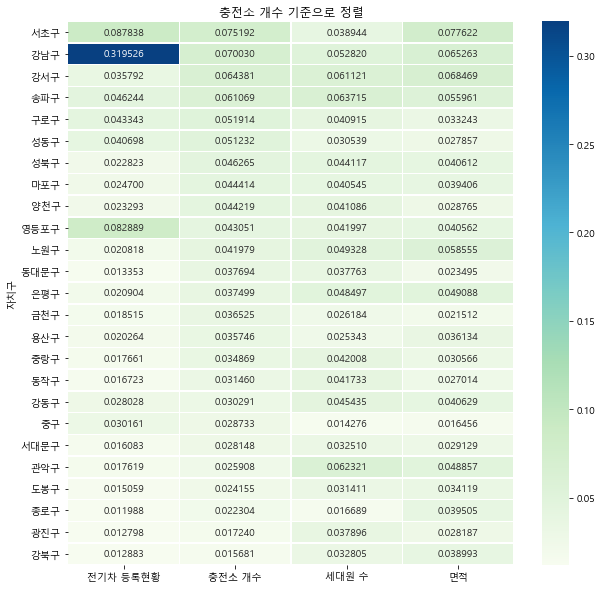

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize = (10,10))
sns.heatmap(data1.sort_values(by='충전소 개수', ascending=False), annot=True, fmt='f', linewidths=.5, cmap='GnBu')
plt.title('충전소 개수 기준으로 정렬')
plt.show()

### 비율 변수 생성해서 분석

In [13]:
data2=pd.read_excel('서울시 최종.xlsx')
data2.drop(['Unnamed: 0','Unnamed: 7','거리'],axis=1,inplace=True)

data2=data2.rename(columns={'서울특별시 자치구':'자치구','전기차 등록현황\n(2021.1 기준)':'전기차 등록현황',
                    '충전소 개수\n(2020.12 기준)':'충전소 개수','세대원 수\n(2021.2/4분기 기준)':'세대원 수',
                    '면적\n(2020 기준)':'면적'})

data2=data2.drop(index=25)

data2=data2.set_index('자치구')

data2['전기차/충전소']=data2['전기차 등록현황']/data2['충전소 개수'] # 충전소 한개당 전기차 개수
data2['전기차/세대']=data2['전기차 등록현황']/data2['세대원 수'] #세대원 한명당 전기차 개수
data2['충전소/면적']=data2['충전소 개수']/data2['면적'] #면적당 충전소 개수

## folium 시각화

In [9]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [14]:
## 충전소 한개당 전기차 개수 
# -> 강남구가 충전소 한개당 전기차 개수가 가장 많으므로 다른 자치구에 비해 충전소가 부족한 것을 알 수 있음.

map1 = folium.Map(location=[37.5502, 126.982], zoom_start=10.5) # tiles='Stamen Toner'

folium.Choropleth(geo_data=geo_str,
                  data = data2['전기차/충전소'],
                  columns = [data2.index, data2['전기차/충전소']],
                  fill_color = 'PuRd', #PuRd, YlGnBu
                  key_on = 'feature.id').add_to(map1)
map1

In [16]:
## 면적당 충전소 개수
# 면적당 충전소 개수가 많은거면 이미 충전소 인프라가 어느정도 잘 구축되어 있다는 것
# -> 연한 부분 중에서 인프라 구축 제안 가능

map1 = folium.Map(location=[37.5502, 126.982], zoom_start=10.5) # tiles='Stamen Toner'

folium.Choropleth(geo_data=geo_str,
                  data = data2['충전소/면적'],
                  columns = [data2.index, data2['충전소/면적']],
                  fill_color = 'PuRd', #PuRd, YlGnBu
                  key_on = 'feature.id').add_to(map1)
map1

In [15]:
## 세대원 한명당 전기차 개수
#-> 세대원 한명당 전기차 개수가 가장 많은 자치구는 '강남구'

map1 = folium.Map(location=[37.5502, 126.982], zoom_start=10.5) # tiles='Stamen Toner'

folium.Choropleth(geo_data=geo_str,
                  data = data2['전기차/세대'],
                  columns = [data2.index, data2['전기차/세대']],
                  fill_color = 'PuRd', #PuRd, YlGnBu
                  key_on = 'feature.id').add_to(map1)
map1